revisão

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn import datasets

# Carregando o dataset Iris
iris = datasets.load_iris()

# Extraindo os dados e criando um DataFrame
X = iris.data  # Características (features)
y = iris.target  # Classes (target)
feature_names = iris.feature_names
target_names = iris.target_names

# Criando um DataFrame para melhor visualização
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Visualizando as primeiras linhas do dataset
print("Primeiras linhas do dataset Iris:")
print(df.head())

Primeiras linhas do dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [2]:
print("Estatísticas descritivas do dataset Iris:")
print(df.describe())

Estatísticas descritivas do dataset Iris:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [3]:
print("Distribuição das classes (espécies):")
print(df['species'].value_counts())


Distribuição das classes (espécies):
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


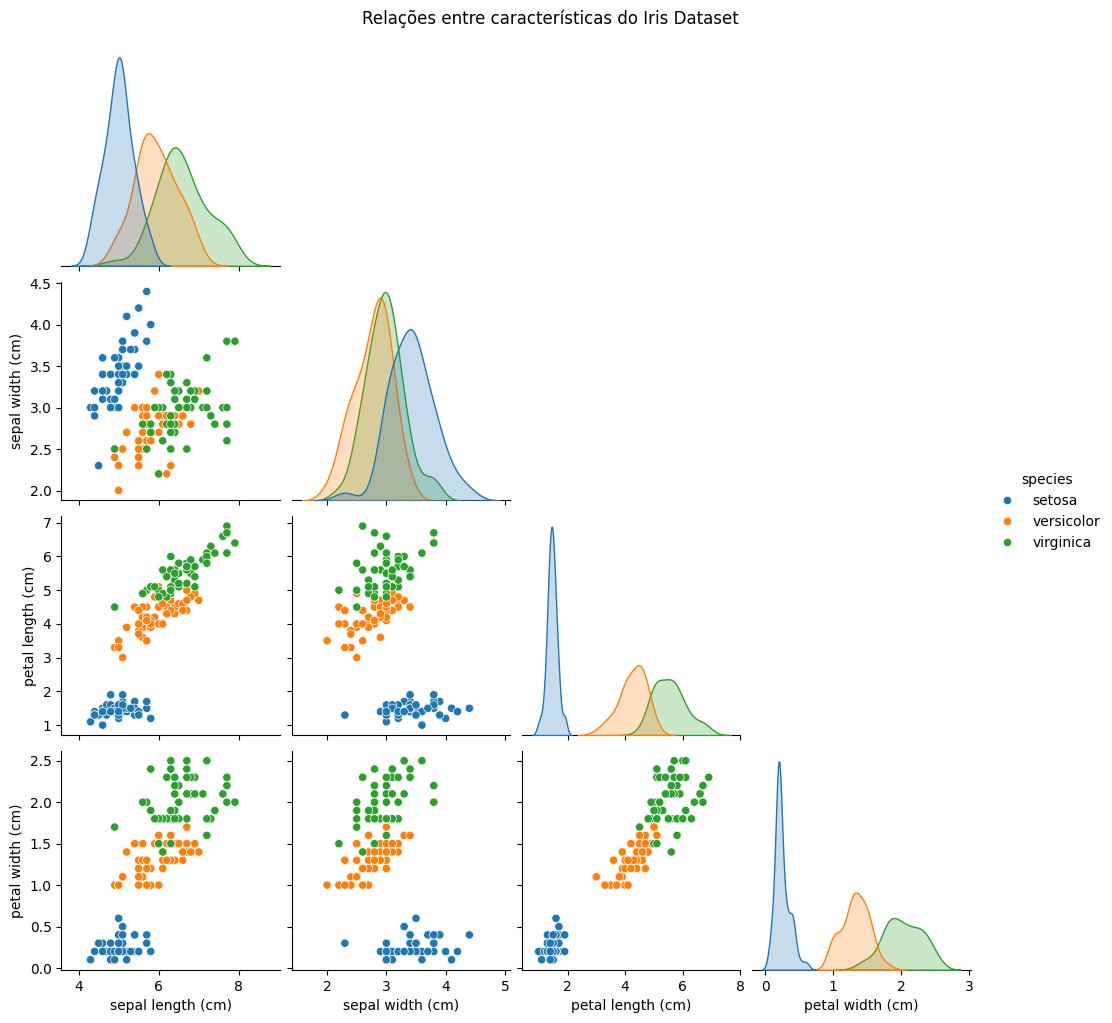

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot com cores por espécie
sns.pairplot(df, hue='species', corner=True)
plt.suptitle("Relações entre características do Iris Dataset", y=1.02)
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Separar os dados e os rótulos
X = df.drop('species', axis=1)
y = df['species']

# Dividir os dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanhos dos conjuntos:")
print("Treinamento:", X_train.shape)
print("Teste:", X_test.shape)


Tamanhos dos conjuntos:
Treinamento: (105, 4)
Teste: (45, 4)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.9555555555555556

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Matriz de Confusão:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Inicializar os modelos
models = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM (RBF kernel)': SVC(kernel='rbf', random_state=42)
}

# Treinar, prever e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))



=== KNN (k=3) ===
Acurácia: 0.9555555555555556
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Matriz de Confusão:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]

=== Decision Tree ===
Acurácia: 0.9333333333333333
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de Confusão:
[[15 

In [8]:
from sklearn.model_selection import GridSearchCV

# Dicionários de modelos e grids
param_grids = {
    'KNN': {
        'n_neighbors': list(range(1, 11))
    },
    'Decision Tree': {
        'max_depth': [2, 3, 4, 5, 6, None],
        'criterion': ['gini', 'entropy']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    }
}

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Rodar GridSearch para cada modelo
best_models = {}

for name in models:
    print(f"\n🔍 Otimizando {name}...")
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    
    print(f"Melhores hiperparâmetros para {name}:")
    print(grid.best_params_)
    
    y_pred = grid.predict(X_test)
    print(f"Acurácia no teste: {accuracy_score(y_test, y_pred):.4f}")



🔍 Otimizando KNN...
Melhores hiperparâmetros para KNN:
{'n_neighbors': 9}
Acurácia no teste: 0.9556

🔍 Otimizando Decision Tree...
Melhores hiperparâmetros para Decision Tree:
{'criterion': 'gini', 'max_depth': 3}
Acurácia no teste: 0.9778

🔍 Otimizando SVM...
Melhores hiperparâmetros para SVM:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Acurácia no teste: 0.9556


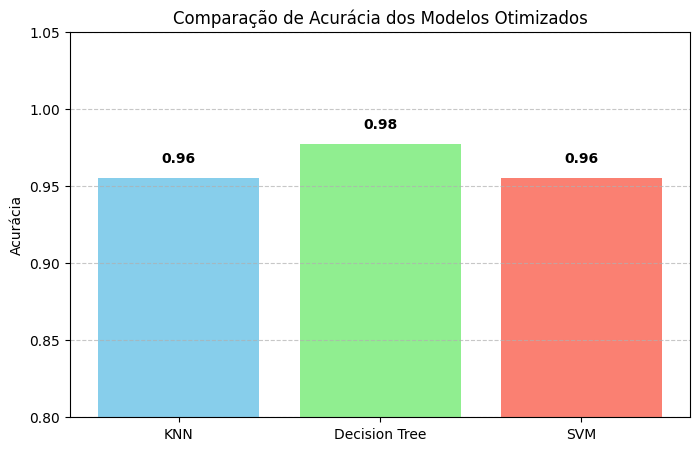

In [9]:
import matplotlib.pyplot as plt

# Avaliar a acurácia dos melhores modelos
accuracies = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plotar gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0.8, 1.05)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos Otimizados')
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
